@author: Ahmet Furkan DEMIR

![](https://img.shields.io/badge/Python-14354C?style=for-the-badge&logo=python&logoColor=white) ![](https://img.shields.io/badge/TensorFlow%20-%23FF6F00.svg?&style=for-the-badge&logo=TensorFlow&logoColor=white) ![](https://img.shields.io/badge/Keras-D00000?style=for-the-badge&logo=Keras&logoColor=white)

In [3]:
from keras.preprocessing.image import ImageDataGenerator
import keras
import os
import tensorflow as tf
import matplotlib.pyplot as plt
import numpy as np

ModuleNotFoundError: No module named 'keras'

In [4]:
!mkdir Train
!mkdir Test

!mkdir Train/Fake
!mkdir Train/Real

!mkdir Test/Fake
!mkdir Test/Real

The syntax of the command is incorrect.
The syntax of the command is incorrect.
The syntax of the command is incorrect.
The syntax of the command is incorrect.


In [3]:
# Train verilerini keras 'ın okuyabileceği şekilde konumlarını yeniden düzenliyorum.

PATH = "/kaggle/input/signature-verification-dataset/sign_data/train/"

for i in os.listdir(PATH):
    
    contol = i.split("_")
    
    try:
    
        if contol[1]=="forg":
            
            os.system("cp -r {} Train/Fake".format(PATH+i))
            
    except:
        
        os.system("cp -r {} Train/Real".format(PATH+i))
        

In [4]:
# Test verilerini keras 'ın okuyabileceği şekilde konumlarını yeniden düzenliyorum.

PATH = "/kaggle/input/signature-verification-dataset/sign_data/test/"

for i in os.listdir(PATH):
    
    contol = i.split("_")
    
    try:
    
        if contol[1]=="forg":
            
            os.system("cp -r {} Test/Fake".format(PATH+i))
            
    except:
        
        os.system("cp -r {} Test/Real".format(PATH+i))
        

In [5]:
# konumları

train_dir = os.path.join("/kaggle/working/Train") 

test_dir = os.path.join("/kaggle/working/Test") 

In [6]:
train_datagen = ImageDataGenerator(

      # resim pixellerini 0,1 arasına sıkıştırma
      rescale=1./255,

      # derece cinsinden (0-180) resimlerin rastgele döndürülme açısı
      rotation_range=40,

      # resimlerin yatayda ve dikeyde kaydırılma oranları
      width_shift_range=0.2,

      # resimlerin yatayda ve dikeyde kaydırılma oranları
      height_shift_range=0.2,

      # burkma işlemi
      shear_range=0.2,

      # yakınlaştırma işlemi
      zoom_range=0.2,

      # dikeyde resim döndürme
      horizontal_flip=True,

      # işlemlerden sonra ortaya çıkan  fazla 
      # görüntü noktalarının nasıl doldurulacağını belirler
      fill_mode='nearest')

test_datagen = ImageDataGenerator(rescale=1./255)

In [7]:
train_generator = train_datagen.flow_from_directory(

        # hedef dizin
        train_dir,

        # tüm resimler (150x150) olarak boyutlandırılacak
        target_size=(200, 200),

        # yığın boyutu
        batch_size=64,

        # binary_crossentropy kullandığımız için
        # ikili etiketler gerekiyor.
        class_mode='binary')

Found 1649 images belonging to 2 classes.


In [8]:
test_generator = test_datagen.flow_from_directory(

        test_dir,

        target_size=(200, 200),

        batch_size=64,

        class_mode='binary')

Found 500 images belonging to 2 classes.


Label :  1.0


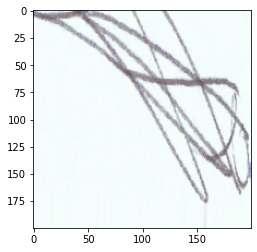

In [16]:
plt.imshow(train_generator[0][0][5])
print("Label : ",train_generator[0][1][5])

Label :  0.0


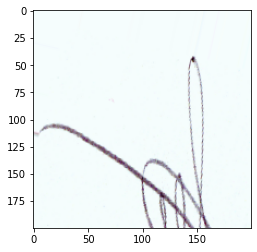

In [10]:
plt.imshow(train_generator[0][0][60])
print("Label : ",train_generator[0][1][60])

In [11]:
class MyModel(tf.keras.Model):

  def __init__(self):
    super(MyModel, self).__init__()
    
    self.cnn1 = tf.keras.layers.Conv2D(16, (3, 3), activation='relu', input_shape=(3,200,200))
    self.cnn2 = tf.keras.layers.Conv2D(32, (3, 3), activation='relu')
    self.cnn3 = tf.keras.layers.Conv2D(16, (3, 3), activation='relu')
    
    self.flatten = tf.keras.layers.Flatten()
    
    self.dense1 = tf.keras.layers.Dense(512, activation='relu')
    self.dense2 = tf.keras.layers.Dense(1, activation='sigmoid')

  def call(self, inputs):
    
    x = self.cnn1(inputs)
    x = self.cnn2(x)
    x = self.cnn3(x)
    x = self.flatten(x)
    x = self.dense1(x)
    x = self.dense2(x)
    
    return x

model = MyModel()

In [12]:
input_shape = (None, 200, 200, 3)
model.build(input_shape)
model.summary()

Model: "my_model"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              multiple                  448       
_________________________________________________________________
conv2d_1 (Conv2D)            multiple                  4640      
_________________________________________________________________
conv2d_2 (Conv2D)            multiple                  4624      
_________________________________________________________________
flatten (Flatten)            multiple                  0         
_________________________________________________________________
dense (Dense)                multiple                  308314624 
_________________________________________________________________
dense_1 (Dense)              multiple                  513       
Total params: 308,324,849
Trainable params: 308,324,849
Non-trainable params: 0
____________________________________________

In [13]:
model.compile(
    # kayıp fonksiyonu
    loss="binary_crossentropy",
    
    # eniyileme:
    # ağımızın girdisi olan veri ile oluşturduğu kaybı göz önünde
    # bulundurarak kendisini güncelleme mekanizması
    optimizer=tf.keras.optimizers.RMSprop(lr=2e-5),

    # eğitim ve test süresince takip edilecek metrikler. 
    metrics=["acc"])

In [14]:
# acc, loss, val_acc, val_loss değerlerini history adlı değişkenden alacağız.
history = model.fit_generator(

    # eğitim verileri
    train_generator,

    # döngü bitene kadar geçeceği örnek sayısı (alınacak yığın)
    steps_per_epoch=train_generator.samples//train_generator.batch_size,

    # döngü sayısı
    epochs=40,

    verbose=2)


/opt/conda/lib/python3.7/site-packages/tensorflow/python/keras/engine/training.py:1844: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  warnings.warn('`Model.fit_generator` is deprecated and '


Epoch 1/40
25/25 - 29s - loss: 0.8381 - acc: 0.5199
Epoch 2/40
25/25 - 22s - loss: 0.6901 - acc: 0.5678
Epoch 3/40
25/25 - 22s - loss: 0.6453 - acc: 0.6202
Epoch 4/40
25/25 - 23s - loss: 0.6182 - acc: 0.6517
Epoch 5/40
25/25 - 22s - loss: 0.5940 - acc: 0.6814
Epoch 6/40
25/25 - 22s - loss: 0.5706 - acc: 0.7066
Epoch 7/40
25/25 - 22s - loss: 0.5573 - acc: 0.7338
Epoch 8/40
25/25 - 22s - loss: 0.5510 - acc: 0.7256
Epoch 9/40
25/25 - 23s - loss: 0.5164 - acc: 0.7558
Epoch 10/40
25/25 - 23s - loss: 0.5194 - acc: 0.7502
Epoch 11/40
25/25 - 22s - loss: 0.5115 - acc: 0.7577
Epoch 12/40
25/25 - 22s - loss: 0.4916 - acc: 0.7640
Epoch 13/40
25/25 - 22s - loss: 0.4893 - acc: 0.7716
Epoch 14/40
25/25 - 22s - loss: 0.4784 - acc: 0.7798
Epoch 15/40
25/25 - 22s - loss: 0.4759 - acc: 0.7893
Epoch 16/40
25/25 - 22s - loss: 0.4593 - acc: 0.7975
Epoch 17/40
25/25 - 22s - loss: 0.4399 - acc: 0.8063
Epoch 18/40
25/25 - 23s - loss: 0.4397 - acc: 0.8025
Epoch 19/40
25/25 - 22s - loss: 0.4254 - acc: 0.8227
Ep

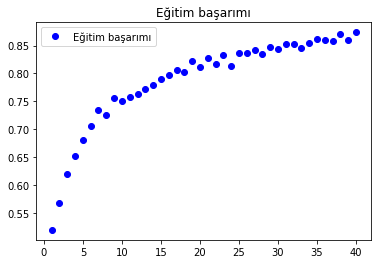

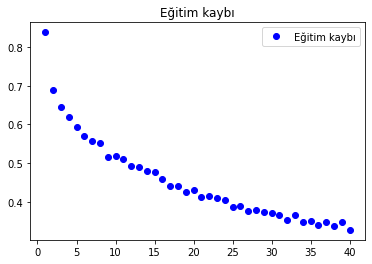

In [17]:
# Eğitim başarım skoru
acc = history.history["acc"]

# eğitim kayıp skoru
loss = history.history["loss"]

# epochs sayısına göre grafik çizdireceğiz.
epochs = range(1, len(acc) + 1)

# eğitim başarımını kendine özel çizdirdik.
plt.plot(epochs, acc, "bo", label="Eğitim başarımı")

# çizdirmemizin başlığı
plt.title("Eğitim başarımı")

plt.legend()

plt.figure()

# eğitim kaybını kendine özel çizdirdik.
plt.plot(epochs, loss, "bo", label="Eğitim kaybı")


# çizdirmemizin başlığı
plt.title("Eğitim kaybı")

plt.legend()

# ekrana çıkartma
plt.show()

In [23]:
# Test verileri ile kayip ve doğrulama 
model.evaluate(test_generator)

8/8 [==============================] - 3s 283ms/step - loss: 0.2188 - acc: 0.9320


[0.21882186830043793, 0.9319999814033508]

Label :  1.0
Predict :  1.0


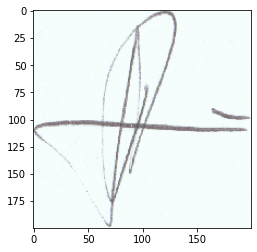

In [34]:
plt.imshow(test_generator[0][0][5])
print("Label : ",test_generator[0][1][5])

test_input = test_generator[0][0][5]
test_input = np.expand_dims(test_input,axis=0)
test_input = np.expand_dims(test_input,axis=0)
test_input = np.expand_dims(test_input,axis=0)

pred = model.predict(test_input)

if pred>=0.5:
    pred = 1
    
else:
    
    pred = 0
    
print("Predict : ",float(pred))

Label :  0.0
Predict :  0.0


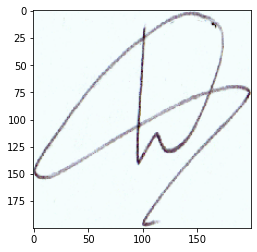

In [37]:
plt.imshow(test_generator[0][0][30])
print("Label : ",test_generator[0][1][30])

test_input = test_generator[0][0][30]
test_input = np.expand_dims(test_input,axis=0)
test_input = np.expand_dims(test_input,axis=0)
test_input = np.expand_dims(test_input,axis=0)

pred = model.predict(test_input)

if pred>=0.5:
    pred = 1
    
else:
    
    pred = 0
    
print("Predict : ",float(pred))